<h2>Imports</h2>

In [2]:
#Data
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Load dataset</h2>

In [3]:
#Load dataset
df = pd.read_csv('neo_v2.csv')
df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


<h2>Irrelevant data</h2>

In [4]:
#Eliminate irrevelant columns
df = df.drop(['orbiting_body','sentry_object'], axis=1)

In [5]:
#Verify if any column contains NaN or NULL values
df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [6]:
#Columns
df.columns

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'absolute_magnitude',
       'hazardous'],
      dtype='object')

In [7]:
#Data types
df.dtypes

id                      int64
name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
absolute_magnitude    float64
hazardous                bool
dtype: object

In [8]:
#Tranasform column's hazardous to an object
df['hazardous'] = df['hazardous'].astype('object')

<h2>Visualizations</h2>

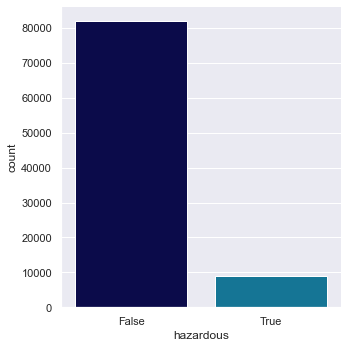

In [9]:
sns.set_theme(style='darkgrid')
sns.catplot(x='hazardous', kind='count', data=df, palette='ocean')

<p style='font-family: Cascadia Code'>Observing the graph, on the one hand we see that a little more than 80.000 asteroids are reported as not hazardous. On the other hand we see that fewer than 10.000 asteroids were reported as hazardous</p>

In [10]:
hazardous_asteoroids = df[df['hazardous']==True]
hazardous_asteoroids.drop(['id'], axis=1, inplace=True)
hazardous_asteroid_mean_list = []
for col in hazardous_asteoroids:
    if col=='name':
        pass
    else:
        hazardous_asteroid_mean_list.append([col, hazardous_asteoroids[col].mean()])

hazardous_asteoroids_mean = pd.DataFrame(hazardous_asteroid_mean_list, columns=['Information','Mean'])
print('On average hazardous asteroids have the following stats :\n\n'+str(hazardous_asteoroids_mean))

On average hazardous asteroids have the following stats :

          Information          Mean
0    est_diameter_min  2.941341e-01
1    est_diameter_max  6.577038e-01
2   relative_velocity  6.279434e+04
3       miss_distance  3.994623e+07
4  absolute_magnitude  2.030760e+01
5           hazardous  1.000000e+00


C:\Users\User\AppData\Local\Temp/ipykernel_14256/3054372748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hazardous_asteoroids.drop(['id'], axis=1, inplace=True)


In [11]:
#Description about all asteroid 
numeric_values = ["est_diameter_min","est_diameter_max","relative_velocity","miss_distance","absolute_magnitude"]
df[numeric_values].describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


<h3>Multiple distributions in dataset</h3>

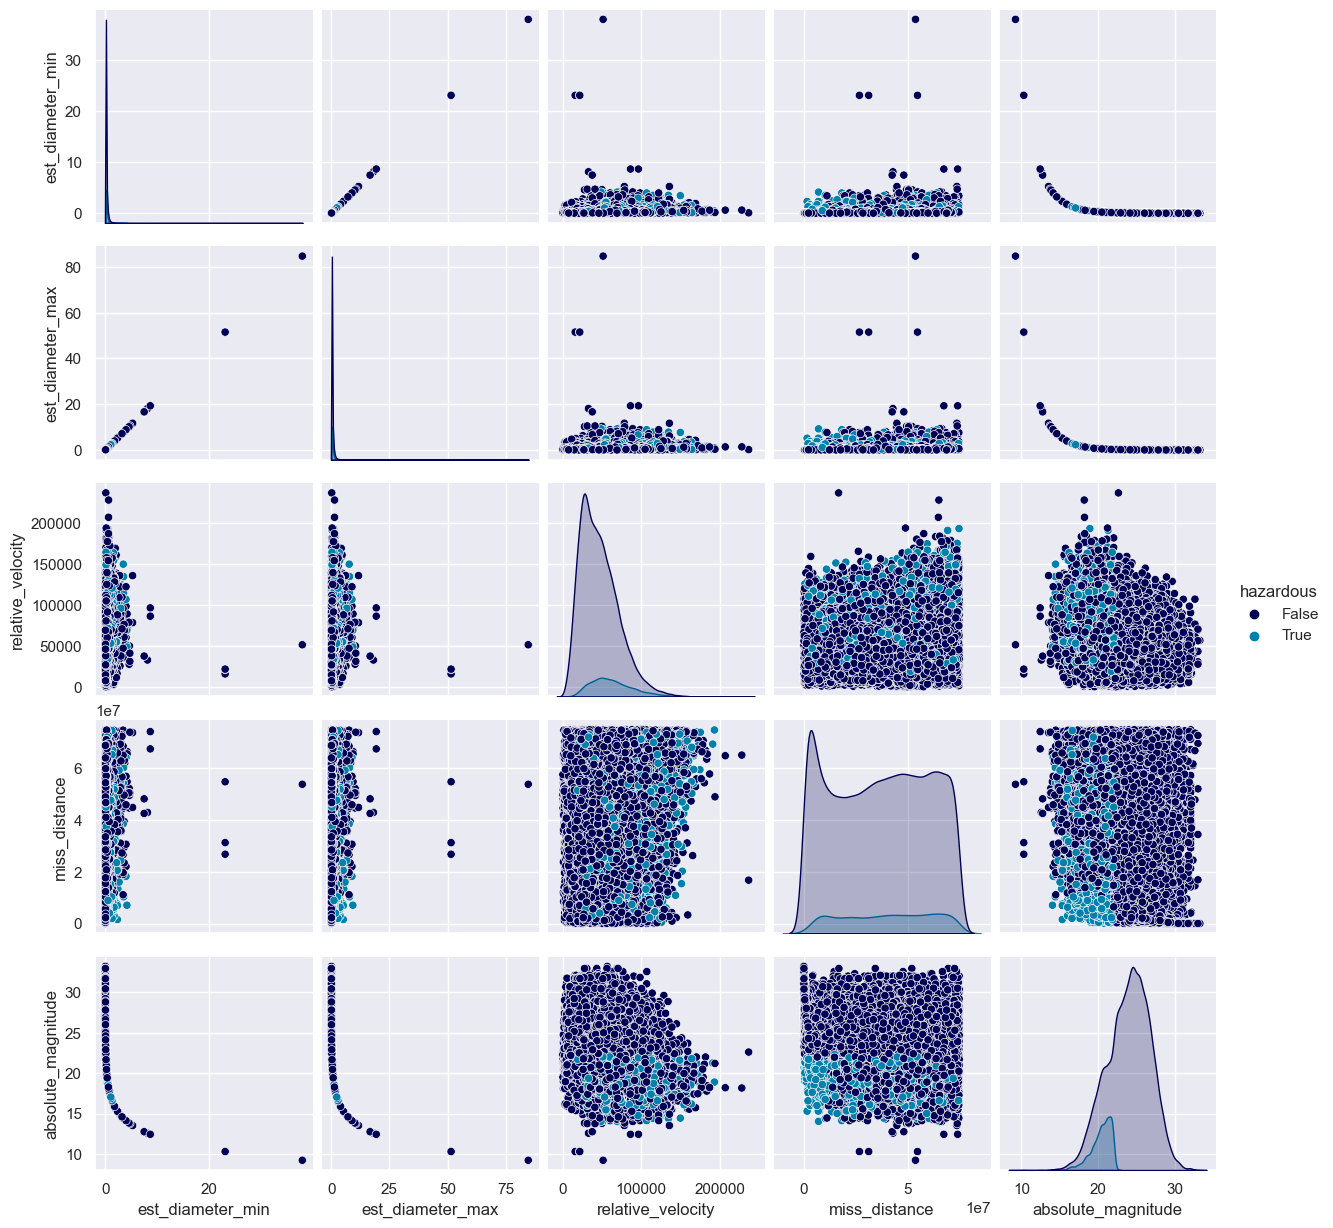

In [12]:
sns.pairplot(df[numeric_values+['hazardous']], hue='hazardous', palette='ocean')

<h2>Is there any correlation with the data?</h2>

<AxesSubplot:>

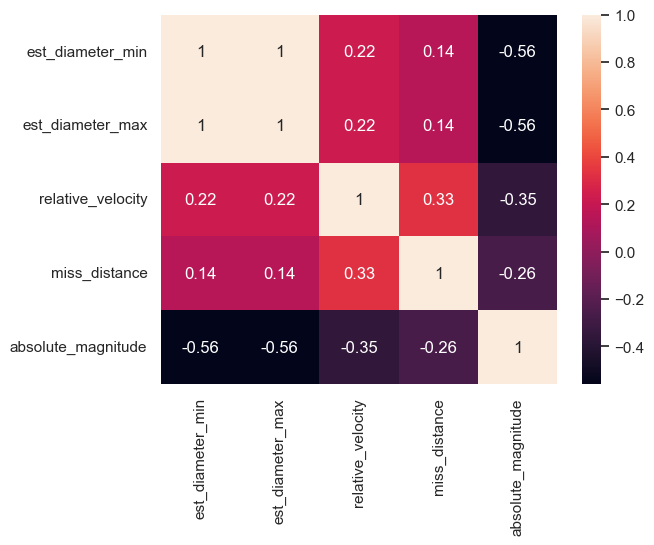

In [13]:
#Heat map correlation
sns.heatmap(df[numeric_values+['hazardous']].corr(), annot=True)

<p style='font-family: Cascadia Code'>Observing the heatmap, we see that exists a correlation between est_diameter_max and est_diameter_min, so we could consider that if an asteroid has a large diameter it is supposed to be dangerous</p>

In [14]:
hazardous_asteoroids_df = hazardous_asteoroids['est_diameter_max'].mean()
hazardous_asteoroids_df

0.6577037728328281

<p style='font-family: Cascadia Code'>As we see, on average, the hazardous asteroids have a maximus estimated diameter of 0.65 kilometers</p>

<h2>Informative graphs by hazardous asteroids</h2>

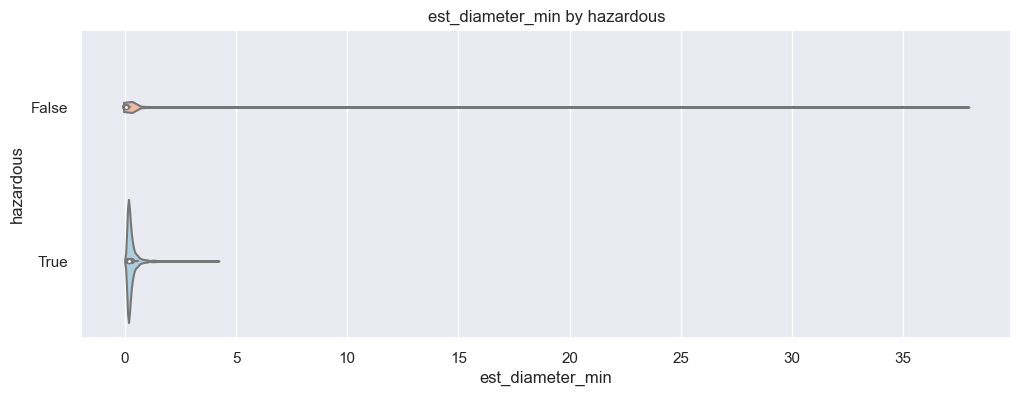

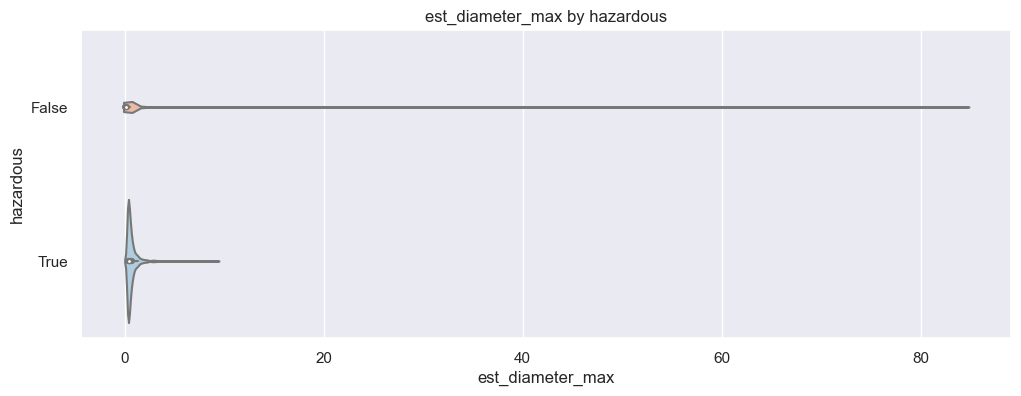

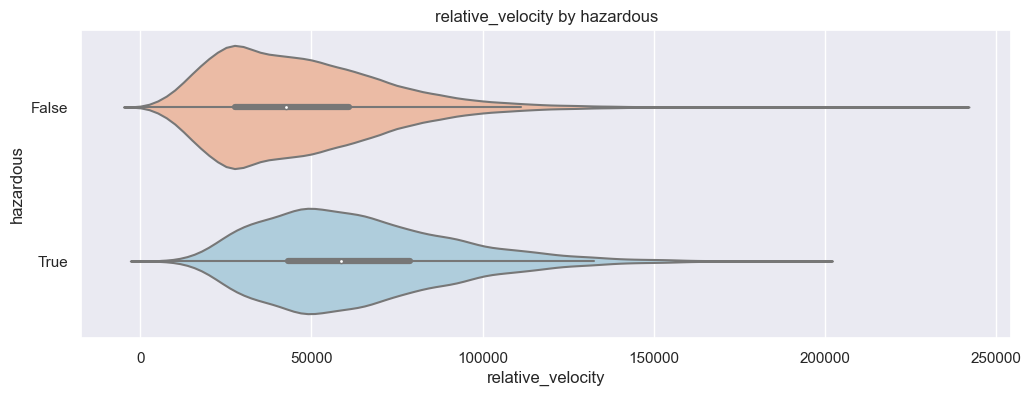

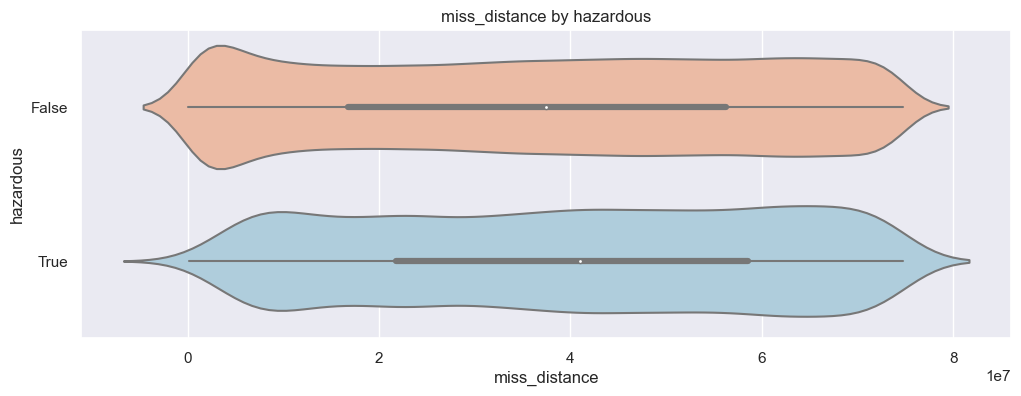

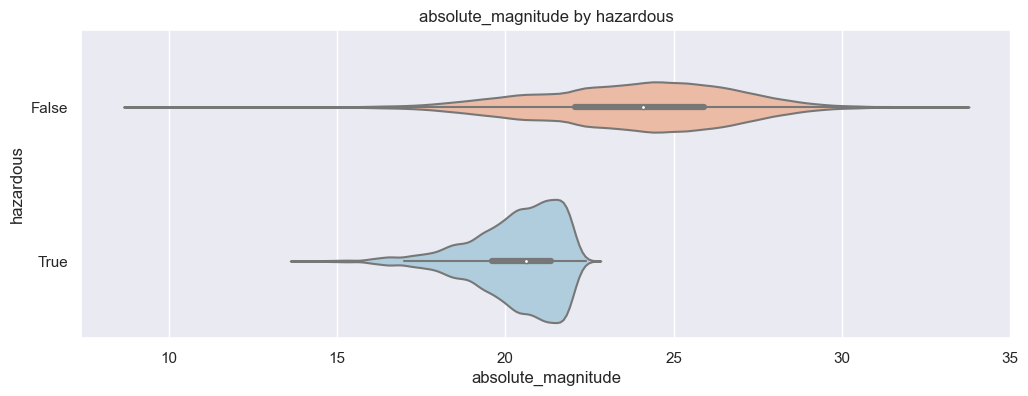

In [15]:
for k in numeric_values:
    plt.figure(figsize=(12,4))
    sns.violinplot(data=df, x=k, y='hazardous', orient='h', palette='RdBu')
    title = k +' by hazardous'
    plt.title(title)